In [1]:
import torch
import torchvision
import torchvision.datasets as data

In [2]:
#!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
#!tar -zxvf MNIST.tar.gz
dataset = data.MNIST(root = '/home/anmol/Programming/python/Deep Learning/')#,download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = data.MNIST(root='/home/anmol/Programming/python/Deep Learning/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD3A90B80D0>, 5)

Label: 5


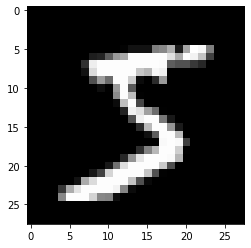

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [8]:
# MNIST dataset (images and labels)
dataset = data.MNIST(root='/home/anmol/Programming/python/Deep Learning/', 
                train=True,
                transform=transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

torch.Size([1, 28, 28]) 5
tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`.
## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [10]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [11]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
model.weight
print(model.bias.shape)
model.bias

torch.Size([10, 784])
torch.Size([10])


Parameter containing:
tensor([ 0.0201,  0.0149, -0.0327,  0.0307, -0.0070,  0.0116, -0.0180,  0.0069,
         0.0080,  0.0132], requires_grad=True)

In [12]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break
# gives error as nn.Linear expects input in form of a vector so flattening out the input

tensor([0, 1, 6, 8, 4, 7, 4, 8, 4, 8, 7, 6, 3, 8, 1, 6, 9, 2, 5, 5, 8, 7, 7, 9,
        2, 2, 4, 8, 2, 4, 3, 2, 3, 8, 8, 0, 5, 3, 8, 2, 3, 9, 6, 8, 6, 8, 6, 4,
        1, 2, 9, 0, 7, 7, 0, 9, 9, 3, 0, 3, 5, 6, 8, 6, 5, 6, 3, 6, 6, 0, 5, 3,
        0, 6, 3, 8, 5, 5, 4, 5, 6, 0, 1, 3, 8, 9, 3, 6, 0, 2, 3, 9, 3, 9, 1, 2,
        3, 0, 7, 1, 0, 7, 7, 8, 8, 4, 5, 2, 8, 8, 1, 7, 8, 5, 7, 6, 2, 9, 0, 0,
        0, 0, 0, 9, 4, 6, 5, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [13]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [14]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [15]:
model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0041,  0.0065, -0.0351,  ..., -0.0276,  0.0328,  0.0285],
         [-0.0182, -0.0087,  0.0248,  ..., -0.0147,  0.0225,  0.0355],
         [-0.0197, -0.0116, -0.0154,  ..., -0.0201, -0.0029, -0.0202],
         ...,
         [-0.0101,  0.0256, -0.0085,  ...,  0.0231,  0.0227,  0.0208],
         [-0.0278, -0.0234,  0.0248,  ..., -0.0306, -0.0044, -0.0224],
         [ 0.0165, -0.0198,  0.0352,  ...,  0.0242, -0.0055, -0.0234]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0156,  0.0127, -0.0310,  0.0218,  0.0327, -0.0150,  0.0004, -0.0219,
         -0.0335,  0.0116], requires_grad=True)]

In [16]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1327,  0.3282,  0.0398, -0.2392, -0.0270, -0.0917,  0.0086,  0.1188,
         -0.0321, -0.1197],
        [ 0.0111,  0.2735, -0.1232, -0.0434, -0.0999,  0.0718,  0.0142, -0.2897,
         -0.2042, -0.0203]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [17]:
import torch.nn.functional as F
outputs[:2]
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1116, 0.1357, 0.1017, 0.0769, 0.0951, 0.0891, 0.0986, 0.1100, 0.0946,
         0.0867],
        [0.1042, 0.1355, 0.0911, 0.0987, 0.0932, 0.1107, 0.1045, 0.0771, 0.0840,
         0.1010]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [19]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)
print('labels',labels)
labels = F.one_hot(labels,num_classes=10)
print("after one-hot encoding",labels)

tensor([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 6, 1, 4, 1, 1, 6, 1, 1, 1,
        1, 1, 6, 5, 6, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 0, 5, 2, 1, 1, 1, 1, 1, 1,
        4, 1, 1, 1, 0, 6, 3, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 0, 1, 6, 1, 6, 6, 1,
        1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 3, 5, 5, 5, 1, 9, 1, 1, 6, 6, 1, 1, 1, 1,
        4, 6, 1, 0, 2, 1, 1, 2, 1, 1, 5, 1, 1, 5, 6, 3, 1, 4, 1, 6, 1, 1, 1, 5,
        1, 1, 1, 1, 6, 1, 1, 4])
tensor([0.1357, 0.1355, 0.1262, 0.1861, 0.1614, 0.1249, 0.1515, 0.1453, 0.1326,
        0.1478, 0.1180, 0.1348, 0.1446, 0.1252, 0.1693, 0.1143, 0.1169, 0.1208,
        0.1468, 0.1117, 0.1231, 0.1563, 0.1449, 0.1513, 0.1301, 0.1425, 0.1291,
        0.1247, 0.1170, 0.1402, 0.1385, 0.1253, 0.1908, 0.1200, 0.1461, 0.1600,
        0.1254, 0.1281, 0.1530, 0.1316, 0.1647, 0.1206, 0.1574, 0.1262, 0.1360,
        0.1482, 0.1373, 0.1303, 0.1572, 0.1167, 0.1401, 0.1109, 0.1484, 0.1421,
        0.1276, 0.1400, 0.1136, 0.1196, 0.1396, 0.1268, 0.1250, 0.1300, 0.1203,
       

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [21]:
accuracy(outputs, labels)
probs

tensor([[0.0941, 0.0930, 0.0968,  ..., 0.1271, 0.0989, 0.1290],
        [0.1422, 0.0835, 0.0921,  ..., 0.1304, 0.0869, 0.1138],
        [0.0943, 0.1342, 0.0870,  ..., 0.1011, 0.1156, 0.1061],
        ...,
        [0.0829, 0.1129, 0.0733,  ..., 0.1215, 0.0849, 0.1381],
        [0.1011, 0.1141, 0.1155,  ..., 0.0977, 0.1062, 0.1171],
        [0.0874, 0.0914, 0.1025,  ..., 0.1525, 0.0887, 0.1283]],
       grad_fn=<SoftmaxBackward>)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [22]:
outputs
loss_fn = F.cross_entropy
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3031, grad_fn=<NllLossBackward>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [31]:
# using gradient descent as the optimiser
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results in validation data
    history_train = []
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        #result = evaluate(model,train_loader)
        #model.epoch_end(epoch, result)
        #history_train.append(result)
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history,history_train

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader] # batch-wise validation_step method is used from MnistModel class
    return model.validation_epoch_end(outputs) # epoch values are generated using validation_epoch_end method


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [37]:
# re-defining MnistModel class to include more methods
class MnistModel(nn.Module):
    # CHANGING THIS TO A PROPER  Neural network
    """
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784) #reshaping input (flatenning it out)
        out = self.linear(xb)
        return out
    """
    def __init__(self,in_size,out_size):
        super().__init__()
        # hidden layer 1
        self.layer1 = nn.Linear(in_size,64)
        # hidden layer 2
        self.layer2 = nn.Linear(64,128)
        # hidden layer 3
        self.layer3 = nn.Linear(128,64)
        # output layer
        self.layer4 = nn.Linear(64,out_size)
        
    def forward(self,xb):
        out = xb.view(xb.size(0),-1)
        out = self.layer1(out)
        out = torch.relu(out)
        out = self.layer2(out)
        out = torch.relu(out)
        out = self.layer3(out)
        out = torch.relu(out)
        out = self.layer4(out)
        #print('before softmax',out)
        #out = torch.softmax(out,dim=0)
        #print('after applying softmax',out)
        return out
    
    def training_step(self, batch):   # operation on a batch of input
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel(in_size= 784,out_size=10)

In [38]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3026037216186523, 'val_acc': 0.13043908774852753}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [39]:
history1 = fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4271, val_acc: 0.8658
Epoch [1], val_loss: 0.2749, val_acc: 0.9154
Epoch [2], val_loss: 0.2026, val_acc: 0.9398
Epoch [3], val_loss: 0.1796, val_acc: 0.9432
Epoch [4], val_loss: 0.1459, val_acc: 0.9557


In [40]:
history2 = fit(5, 0.05, model, train_loader, val_loader)
history3 = fit(5, 0.01, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1249, val_acc: 0.9629
Epoch [1], val_loss: 0.1200, val_acc: 0.9647
Epoch [2], val_loss: 0.1179, val_acc: 0.9641
Epoch [3], val_loss: 0.1139, val_acc: 0.9659
Epoch [4], val_loss: 0.1103, val_acc: 0.9657
Epoch [0], val_loss: 0.1040, val_acc: 0.9687
Epoch [1], val_loss: 0.1033, val_acc: 0.9693
Epoch [2], val_loss: 0.1027, val_acc: 0.9696
Epoch [3], val_loss: 0.1023, val_acc: 0.9692
Epoch [4], val_loss: 0.1009, val_acc: 0.9691
Epoch [0], val_loss: 0.1008, val_acc: 0.9689
Epoch [1], val_loss: 0.1009, val_acc: 0.9687
Epoch [2], val_loss: 0.1007, val_acc: 0.9686
Epoch [3], val_loss: 0.1007, val_acc: 0.9692
Epoch [4], val_loss: 0.1006, val_acc: 0.9689


In [42]:
history5 = fit(25, 0.001, model, train_loader, val_loader)
history = history1 + history2 + history3 + history4 +history5

Epoch [0], val_loss: 0.0998, val_acc: 0.9693
Epoch [1], val_loss: 0.0998, val_acc: 0.9696
Epoch [2], val_loss: 0.0997, val_acc: 0.9698
Epoch [3], val_loss: 0.0997, val_acc: 0.9696
Epoch [4], val_loss: 0.0996, val_acc: 0.9698
Epoch [5], val_loss: 0.0996, val_acc: 0.9696
Epoch [6], val_loss: 0.0997, val_acc: 0.9696
Epoch [7], val_loss: 0.0996, val_acc: 0.9699
Epoch [8], val_loss: 0.0996, val_acc: 0.9693
Epoch [9], val_loss: 0.0994, val_acc: 0.9698
Epoch [10], val_loss: 0.0994, val_acc: 0.9698
Epoch [11], val_loss: 0.0995, val_acc: 0.9696
Epoch [12], val_loss: 0.0995, val_acc: 0.9701
Epoch [13], val_loss: 0.0994, val_acc: 0.9700
Epoch [14], val_loss: 0.0993, val_acc: 0.9699
Epoch [15], val_loss: 0.0992, val_acc: 0.9698
Epoch [16], val_loss: 0.0992, val_acc: 0.9698
Epoch [17], val_loss: 0.0993, val_acc: 0.9697
Epoch [18], val_loss: 0.0992, val_acc: 0.9700
Epoch [19], val_loss: 0.0993, val_acc: 0.9698
Epoch [20], val_loss: 0.0993, val_acc: 0.9701
Epoch [21], val_loss: 0.0995, val_acc: 0.969

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 


In [43]:
# Define test dataset
test_dataset = data.MNIST(root='/home/anmol/Programming/python/Deep Learning/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


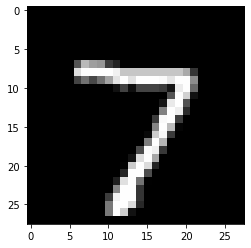

In [44]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [45]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


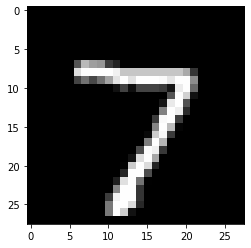

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2


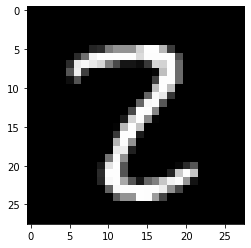

In [47]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [48]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.09204165637493134, 'val_acc': 0.97265625}

In [49]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [50]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-2.3459e-02, -2.5167e-02, -1.3336e-02,  ...,  9.3090e-03,
                       -8.1156e-03, -3.1615e-02],
                      [ 2.5964e-02,  1.8885e-02, -1.0100e-02,  ..., -2.6874e-02,
                       -1.9925e-03, -2.9954e-02],
                      [ 1.6361e-02,  3.3987e-02,  2.3278e-02,  ..., -3.7107e-03,
                       -1.3555e-02,  2.9773e-02],
                      ...,
                      [-1.7228e-03, -3.4604e-02, -2.2041e-02,  ..., -3.1494e-02,
                       -7.4112e-03,  1.4982e-02],
                      [ 9.8619e-03,  2.1688e-02, -1.4468e-02,  ..., -3.1331e-02,
                        2.0164e-02, -2.7014e-02],
                      [ 2.0179e-02,  8.3857e-03,  3.0747e-02,  ..., -2.3913e-02,
                        1.9141e-02,  6.7008e-05]])),
             ('layer1.bias',
              tensor([ 0.0790,  0.1563,  0.0182,  0.0471,  0.0198,  0.0262,  0.0133, -0.0519,
                       0.0567,

In [52]:
model2 = MnistModel(784,10)
print(model2.state_dict())
evaluate(model2, test_loader)

OrderedDict([('layer1.weight', tensor([[ 0.0300,  0.0186, -0.0152,  ...,  0.0091,  0.0066,  0.0074],
        [-0.0316,  0.0183, -0.0271,  ...,  0.0016, -0.0105,  0.0278],
        [ 0.0037, -0.0225, -0.0094,  ...,  0.0177, -0.0025, -0.0206],
        ...,
        [ 0.0308,  0.0230, -0.0005,  ...,  0.0159, -0.0093, -0.0080],
        [-0.0084, -0.0063,  0.0293,  ...,  0.0324,  0.0310, -0.0263],
        [-0.0104,  0.0108, -0.0006,  ...,  0.0222, -0.0183,  0.0276]])), ('layer1.bias', tensor([ 0.0231,  0.0273,  0.0290, -0.0112, -0.0063, -0.0245,  0.0209,  0.0344,
        -0.0116, -0.0310,  0.0042,  0.0247,  0.0297,  0.0280, -0.0317,  0.0203,
        -0.0333, -0.0201,  0.0076,  0.0217,  0.0254,  0.0329,  0.0148, -0.0261,
         0.0062,  0.0041,  0.0228,  0.0030, -0.0064,  0.0269,  0.0111,  0.0075,
         0.0102,  0.0001, -0.0099,  0.0116,  0.0268,  0.0180,  0.0118, -0.0157,
        -0.0095, -0.0222,  0.0107, -0.0177,  0.0244, -0.0176, -0.0264, -0.0291,
         0.0175, -0.0079, -0.0017,  0

{'val_loss': 2.3049659729003906, 'val_acc': 0.10214843600988388}

In [53]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-2.3459e-02, -2.5167e-02, -1.3336e-02,  ...,  9.3090e-03,
                       -8.1156e-03, -3.1615e-02],
                      [ 2.5964e-02,  1.8885e-02, -1.0100e-02,  ..., -2.6874e-02,
                       -1.9925e-03, -2.9954e-02],
                      [ 1.6361e-02,  3.3987e-02,  2.3278e-02,  ..., -3.7107e-03,
                       -1.3555e-02,  2.9773e-02],
                      ...,
                      [-1.7228e-03, -3.4604e-02, -2.2041e-02,  ..., -3.1494e-02,
                       -7.4112e-03,  1.4982e-02],
                      [ 9.8619e-03,  2.1688e-02, -1.4468e-02,  ..., -3.1331e-02,
                        2.0164e-02, -2.7014e-02],
                      [ 2.0179e-02,  8.3857e-03,  3.0747e-02,  ..., -2.3913e-02,
                        1.9141e-02,  6.7008e-05]])),
             ('layer1.bias',
              tensor([ 0.0790,  0.1563,  0.0182,  0.0471,  0.0198,  0.0262,  0.0133, -0.0519,
                       0.0567,

In [54]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.09204165637493134, 'val_acc': 0.97265625}